In [48]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [49]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [50]:
df=pd.read_csv('../data/Season_2019.csv')

In [51]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [52]:
df2=pd.read_csv('../data/Playoffs_2019.csv').drop('Unnamed: 0',axis=1)

Find and eliminate NaNs

In [53]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [54]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [55]:
df.home_win.value_counts(normalize=True)

1    0.529872
0    0.470128
Name: home_win, dtype: float64

In [56]:
df2.home_win.value_counts(normalize=True)

1    0.5
0    0.5
Name: home_win, dtype: float64

In [57]:
df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,WSN,33.083333,4.000000,7.500000,3.833333,3.733750,3.416667,9.333333,37.500000,0.221792,...,9.000000,13.000000,4.000000,0.0,50.000000,0.000000,0.000000,0.211000,1.900000e+00,1
1,OAK,33.000000,1.000000,8.000000,1.000000,0.000000,3.000000,12.000000,37.000000,0.242000,...,6.666667,16.555556,6.666667,0.0,66.111111,2.444444,0.333333,0.211556,1.855556e+00,0
2,ATL,33.500000,3.375000,7.625000,3.125000,2.832500,2.750000,9.000000,37.125000,0.227750,...,11.416667,12.916667,5.416667,0.0,57.583333,2.500000,0.666667,0.096667,5.833333e-01,0
3,LAD,34.125000,4.125000,7.125000,3.875000,3.955000,3.750000,13.125000,38.375000,0.204375,...,9.416667,15.000000,7.000000,0.0,56.458333,2.500000,0.625000,0.007333,7.500000e-01,1
4,HOU,34.333333,4.375000,8.541667,4.083333,4.122083,3.666667,8.250000,38.250000,0.246125,...,6.666667,16.555556,6.666667,0.0,66.111111,2.444444,0.333333,0.211556,1.855556e+00,1
5,ATL,33.500000,3.375000,7.625000,3.125000,2.832500,2.750000,9.000000,37.125000,0.227750,...,11.416667,12.916667,5.416667,0.0,57.583333,2.500000,0.666667,0.096667,5.833333e-01,1
6,LAD,34.125000,4.125000,7.125000,3.875000,3.955000,3.750000,13.125000,38.375000,0.204375,...,9.416667,15.000000,7.000000,0.0,56.458333,2.500000,0.625000,0.007333,7.500000e-01,0
7,NYY,34.000000,4.900000,8.300000,4.700000,4.914000,4.000000,10.000000,38.500000,0.242300,...,8.250000,16.500000,5.750000,0.0,56.000000,3.000000,0.000000,0.276500,2.900000e+00,1
8,WSN,33.083333,4.000000,7.500000,3.833333,3.733750,3.416667,9.333333,37.500000,0.221792,...,11.125000,13.625000,5.000000,0.0,63.875000,0.750000,0.750000,0.110750,5.500000e-01,0
9,STL,33.916667,4.333333,7.583333,4.083333,3.721667,2.833333,10.250000,37.666667,0.213833,...,13.625000,13.250000,7.375000,0.0,60.125000,2.250000,0.500000,0.057500,1.512500e+00,0


In [58]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,NYY,34.462963,5.820988,9.216049,5.580247,5.632593,3.512346,8.870370,38.549383,0.262302,...,11.413580,16.395062,7.179012,0.000000,50.549383,1.385093,0.347826,0.068586,0.470370,1
1,TBR,34.740741,4.746914,8.808642,4.506173,4.573704,3.345679,9.216049,38.796296,0.249895,...,10.450617,13.179012,5.604938,0.018519,44.759259,1.679245,0.515723,-0.041290,-0.733333,0
2,TEX,34.197531,5.000000,8.481481,4.722222,4.666852,3.296296,9.740741,38.296296,0.242006,...,11.913580,13.555556,6.617284,0.000000,48.759259,1.487654,0.462963,-0.006420,-0.281481,0
3,MIA,34.024691,3.796296,8.185185,3.660494,3.545988,2.438272,9.067901,37.314815,0.234074,...,13.172840,14.685185,7.179012,0.000000,48.524691,1.347826,0.453416,0.017148,-0.015432,0
4,TOR,33.907407,4.481481,8.018519,4.302469,4.286975,3.141975,9.345679,37.598765,0.229025,...,11.869565,15.248447,6.645963,0.006211,54.776398,1.139241,0.316456,0.134677,1.446584,0


In [59]:
#for col in X_train.columns:
    #print(col)

In [60]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [61]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [62]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,WSN,33.083333,4.000,7.500000,3.833333,3.733750,3.416667,9.333333,37.500,0.221792,...,9.000000,13.000000,4.000000,0.0,50.000000,0.000000,0.000000,0.211000,1.900000,1
1,OAK,33.000000,1.000,8.000000,1.000000,0.000000,3.000000,12.000000,37.000,0.242000,...,6.666667,16.555556,6.666667,0.0,66.111111,2.444444,0.333333,0.211556,1.855556,0
2,ATL,33.500000,3.375,7.625000,3.125000,2.832500,2.750000,9.000000,37.125,0.227750,...,11.416667,12.916667,5.416667,0.0,57.583333,2.500000,0.666667,0.096667,0.583333,0
3,LAD,34.125000,4.125,7.125000,3.875000,3.955000,3.750000,13.125000,38.375,0.204375,...,9.416667,15.000000,7.000000,0.0,56.458333,2.500000,0.625000,0.007333,0.750000,1
4,HOU,34.333333,4.375,8.541667,4.083333,4.122083,3.666667,8.250000,38.250,0.246125,...,6.666667,16.555556,6.666667,0.0,66.111111,2.444444,0.333333,0.211556,1.855556,1


In [63]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [64]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [52]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [22]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [53]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [71]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

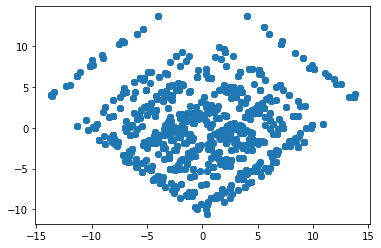

In [51]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [65]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [66]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.6139306775274702
Train Mean Accuracy: 0.6217552533992583
Test Mean Accuracy: 0.5909090909090909
Recall Score: 0.45454545454545453
Precision Score: 0.625
F1 Score: 0.5263157894736842


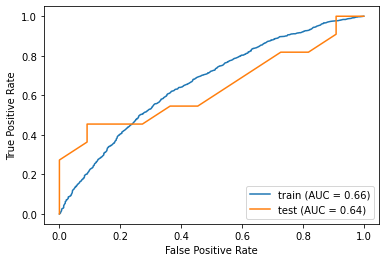

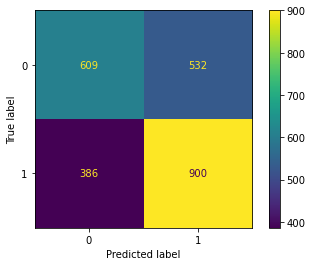

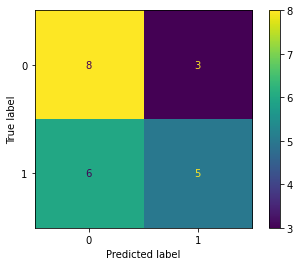

In [67]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [68]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

In [69]:
new_acc(probabilities)

(0.6666666666666666, 10)

### Explore thresehold movement and other things

In [94]:
logregs=LogisticRegression()
logregs.fit(X_train_scaled,y_train)

LogisticRegression()

In [95]:
logregs.predict_proba(X_test_scaled)[:,1] >= 0.6

array([ True,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False])

In [47]:
decisions = (logregs.predict_proba(X_test_scaled) >= .6).astype(int)
len(decisions)

54

In [97]:
today_winners = np.where(y_test!= predictions,'Away','Home')

In [101]:
today_winners

array(['Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Away',
       'Away', 'Away', 'Home', 'Home', 'Away', 'Home', 'Home', 'Home',
       'Away', 'Home', 'Away', 'Away', 'Home', 'Away', 'Home'],
      dtype='<U4')

7 out of 9 playoff series correctly predicted

# KNN

### Home win KNN

Number of Neighbors: 17
Metric: minkowski
Weights: distance
Mean Cross-Val Score: 0.5702685503372789
Train Mean Accuracy: 0.707457766790276
Test Mean Accuracy: 0.6363636363636364
Recall Score: 0.6363636363636364
Precision Score: 0.6363636363636364
F1 score: 0.6363636363636364


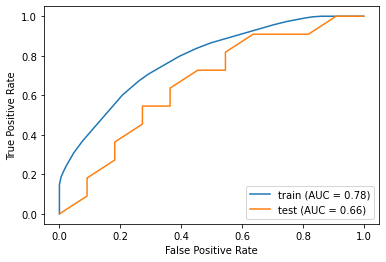

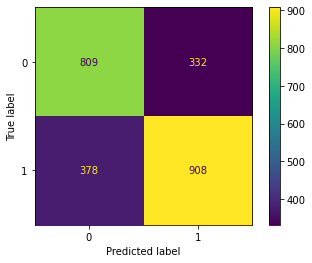

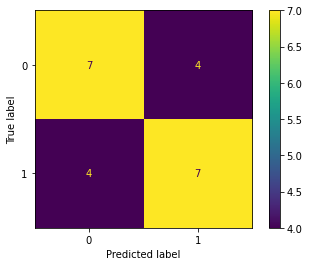

In [70]:
prediction,probabilities=knn(X_train_scaled,X_test_scaled,y_train,y_test)

In [71]:
new_acc(probabilities)

(0.7142857142857143, 5)

# Decision Tree

In [24]:
dfeats= feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = X_train_scaled[dfeats]
X_test_best_tree = X_test_scaled[dfeats]

### Dtree Home Win

Max Depth: 3
Min Sample Split: 2
criterion: entropy
Mean Cross-Val Score: 0.5784319714903907
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.5909090909090909
Recall Score: 0.5454545454545454
Precision Score: 0.6
F1 score: 0.5714285714285713


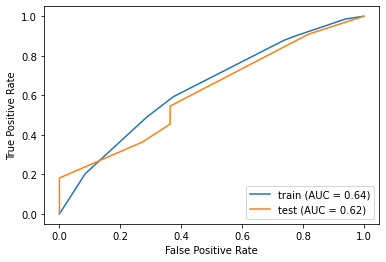

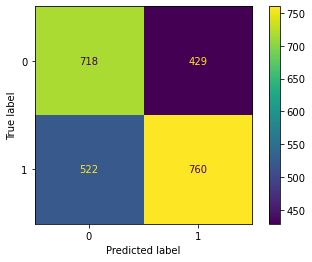

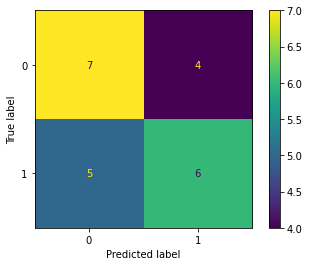

In [25]:
predictions,probabilities=dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

In [27]:
new_acc(probabilities)

0.5833333333333334

# Random Forest

In [72]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 90
criterion: entropy
Mean Cross-Val Score: 0.5702575198336939
Train Mean Accuracy: 0.707457766790276
Test Mean Accuracy: 0.5909090909090909
Recall Score: 0.7272727272727273
Precision Score: 0.5714285714285714
F1 score: 0.64


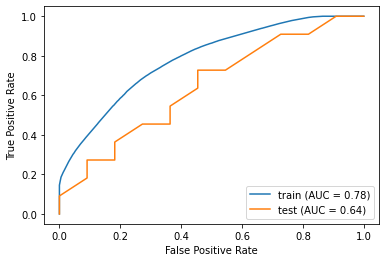

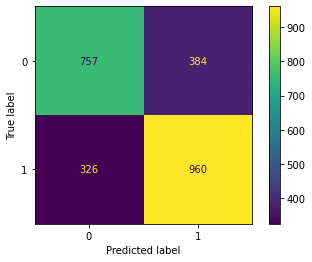

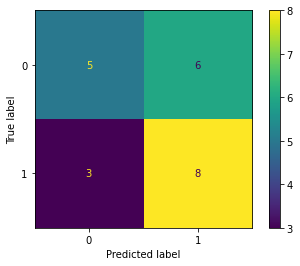

In [73]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [74]:
new_acc(probabilities)

(0.7142857142857143, 5)

# Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 3
Bag Max Features: 2
# of Base Estimators: 500
Mean Cross-Val Score: 0.5891468329727207
Train Mean Accuracy Score: 0.5673116508851379
Test Mean Accuracy Score: 0.5
Recall Score: 1.0
Precision Score: 0.5
F1 score: 0.6666666666666666


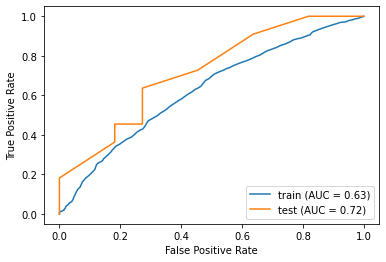

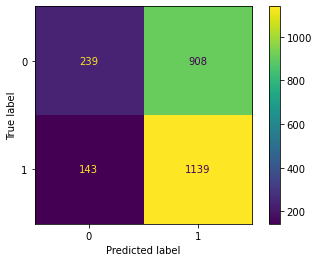

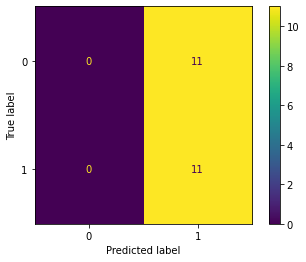

In [53]:
bagged(X_train_scaled,X_test_scaled,y_train,y_test)

# XGBoost

In [56]:
xfeats= feature_select(zero_imp_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = zero_imp_train[xfeats]
X_test_best_x = zero_imp_test[xfeats]

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 3
XGBoost Min Child Weight: 1
XGBoost Subsample: 0.7
XGBoost Estimators: 100
Stopped in Round: 15
Mean Cross-Val Score: 0.5409766238174027
Train Mean Accuracy Score: 0.6990531082750103
Test Mean Accuracy Score: 0.6363636363636364
Recall Score: 0.6363636363636364
Precision Score: 0.6363636363636364
F1 score: 0.6363636363636364


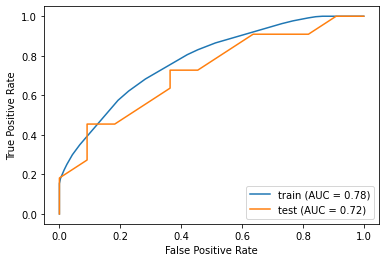

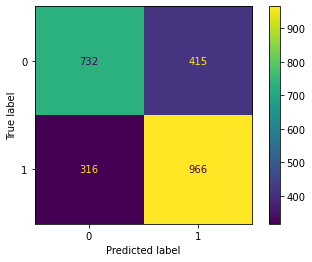

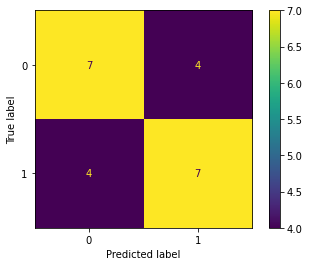

In [57]:
xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)